In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Load dataset
df = pd.read_csv('sentimentdataset.csv')

# Clean column names
df.columns = df.columns.str.strip()


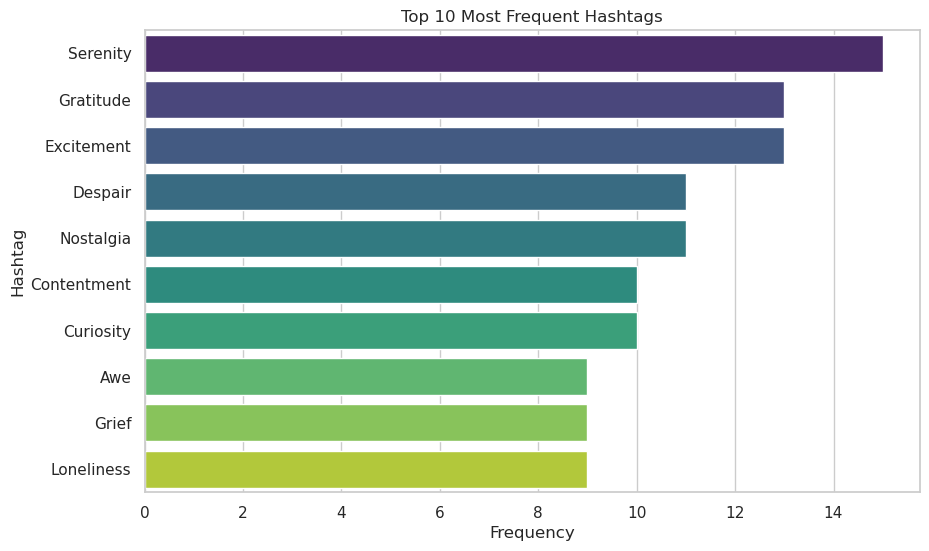

<Figure size 1000x600 with 0 Axes>

In [5]:
 #Step 1: Hashtag Frequency Analysis
# Clean and extract hashtags
df['Hashtags'] = df['Hashtags'].astype(str).str.strip()
all_hashtags = df['Hashtags'].str.split().sum()
hashtag_counts = Counter([tag.strip('#') for tag in all_hashtags if tag])

# Top 10 hashtags
top_hashtags = hashtag_counts.most_common(10)
top_tags, top_freqs = zip(*top_hashtags)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_freqs), y=list(top_tags), palette='viridis')
plt.title('Top 10 Most Frequent Hashtags')
plt.xlabel('Frequency')
plt.ylabel('Hashtag')
plt.figure(figsize=(10, 6), constrained_layout=True)

plt.show()


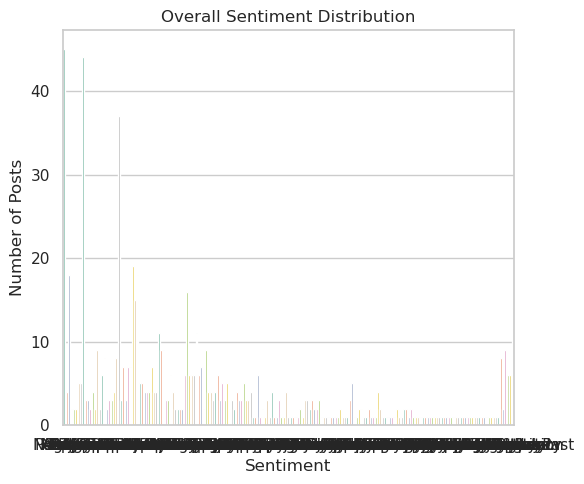

In [10]:
# Clean sentiment column
df['Sentiment'] = df['Sentiment'].str.strip()

# Plot sentiment distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()


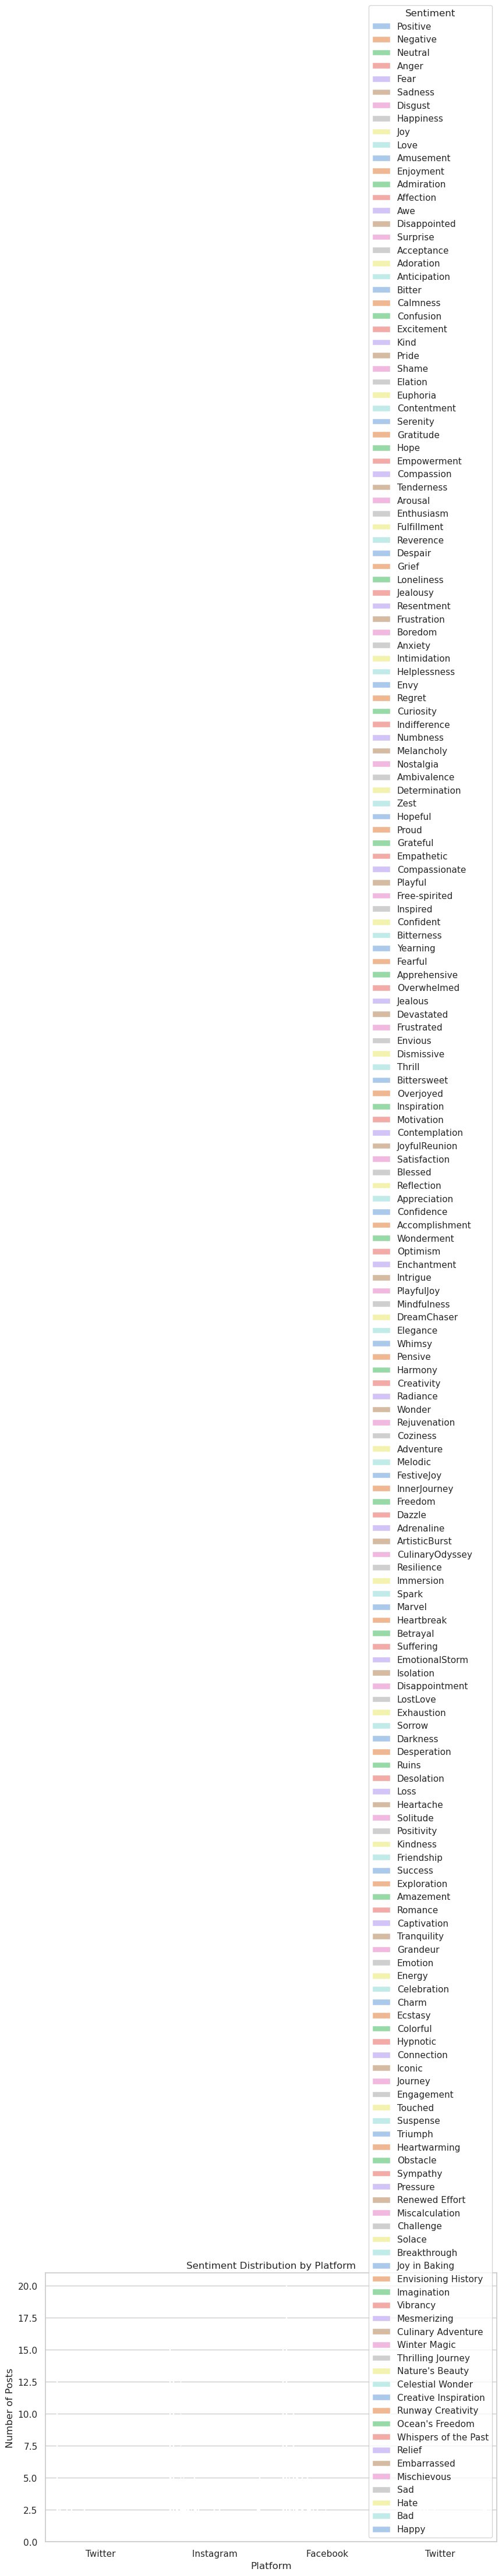

<Figure size 1000x600 with 0 Axes>

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Platform', hue='Sentiment', data=df, palette='pastel')
plt.title('Sentiment Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Posts')
plt.figure(figsize=(10, 6), constrained_layout=True)

plt.show()


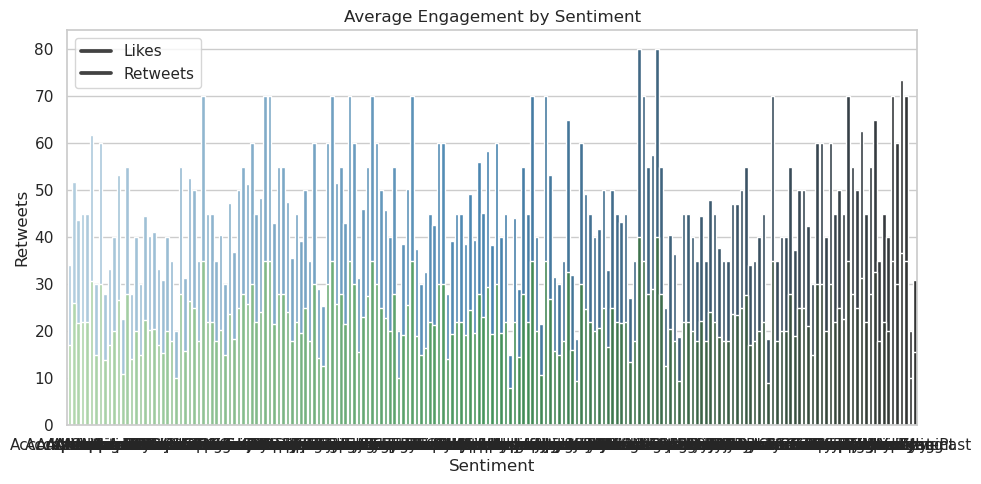

In [9]:
engagement_by_sentiment = df.groupby('Sentiment')[['Likes', 'Retweets']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Sentiment', y='Likes', data=engagement_by_sentiment, palette='Blues_d', label='Likes')
sns.barplot(x='Sentiment', y='Retweets', data=engagement_by_sentiment, palette='Greens_d', label='Retweets')
plt.title('Average Engagement by Sentiment')
plt.legend(['Likes', 'Retweets'])
plt.tight_layout()
plt.show()


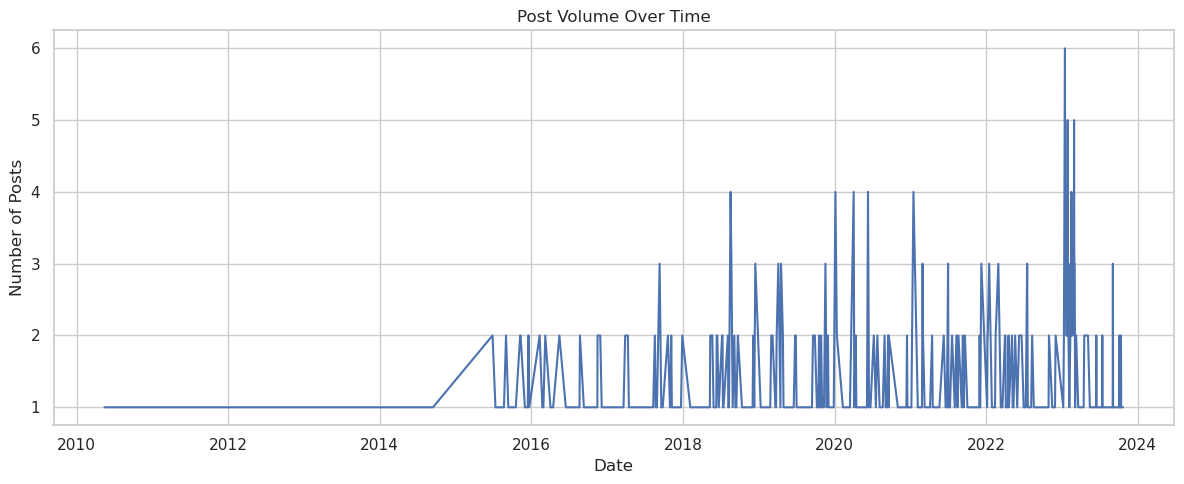

In [8]:
# Convert timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Group by day
daily_posts = df.groupby(df['Timestamp'].dt.date).size()

# Plot
plt.figure(figsize=(12, 5))
daily_posts.plot()
plt.title('Post Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.tight_layout()
plt.show()